# RF

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_ori = pd.read_csv(
    'data/gdf_final.csv').dropna()
X_col = [
    'dist',
    'delta_time',
    'trip_hour',
    'avgtemp',
    '16_earnings',
    'median_earnings',
    'median_age'
]
y_col = ['usage_counts']
classes = ['low', 'mid', 'high']
X = StandardScaler().fit_transform(df_ori[X_col])

In [6]:
y = df_ori[y_col].to_numpy().flatten()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

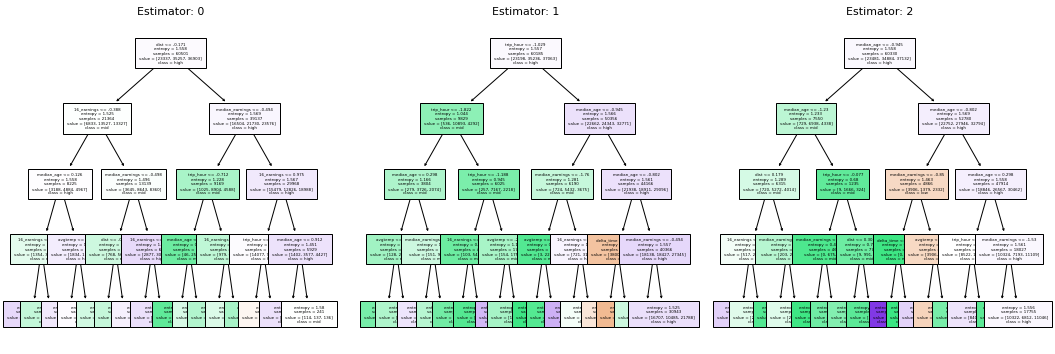

In [28]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (18,6))
for index in range(0, 3):
    tree.plot_tree(regr.estimators_[index],
                   feature_names = X_col, 
                   class_names=classes,
                   filled = True,
                   ax = axes[index],
                   fontsize=4)
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)


In [29]:
fig.savefig('graph/RF_tree.png')

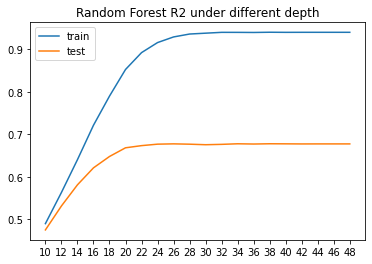

In [8]:
from sklearn.ensemble import RandomForestRegressor
n = 20
test_score_list = np.zeros(n)
train_score_list = np.zeros(n)
depth_list = [int(i) for i in np.linspace(10, 48, n)]
for idx, i in enumerate(depth_list):
    regr = RandomForestRegressor(min_impurity_decrease=1e-05,
                             max_depth=i,
                             max_features='sqrt',
                             oob_score=True,
                             n_estimators=100,
                             criterion='squared_error',
                             random_state=0)
    regr.fit(X, y)
    train_score_list[idx] = regr.score(X, y)
    test_score_list[idx] = regr.oob_score_
    
plt.plot(list(range(n)), train_score_list, label='train')
plt.plot(list(range(n)), test_score_list, label='test')
plt.xticks(list(range(n)), depth_list)
plt.title('Random Forest R2 under different depth')
plt.legend()
 

In [ ]:
plt.plot(list(range(n)), train_score_list, label='train')
plt.plot(list(range(n)), test_score_list, label='test')
plt.xticks(list(range(n)), depth_list)
plt.title('Random Forest R2 under different depth')
plt.legend()